# Analysis of Seattle crime data during the Summer 2014

### Loading of the data

In [59]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as Normalize
import matplotlib.cm as cm
import folium
import branca
import branca.colormap as cm
from dateutil import parser

file = 'seattle_incidents_summer_2014.csv'
df = pd.read_csv(file)


In [60]:
df.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [61]:
smaller_list = ['Offense Code', 'Offense Type', 'Summary Offense Code', 'District/Sector',
                'Zone/Beat', 'Month', 'Year']

# for col in smaller_list:
#     print(col, sorted(set(df[col])))

In [62]:
len(set(df['District/Sector']))

19

In [63]:
len(set(df['Offense Type']))

147

In [64]:
np.isfinite(df['General Offense Number']).sum()

32779

In [65]:
df.shape

(32779, 19)

In [66]:
total_crime_df = df.groupby(['Month'])['General Offense Number'].agg(['count'])
total_crime_df

,count
Month,
6,11125
7,11154
8,10500


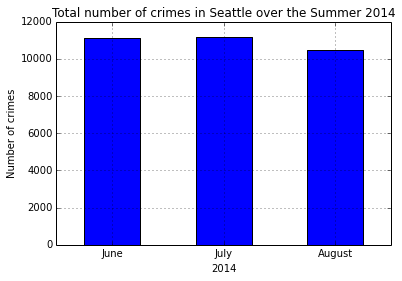

In [67]:
plt.figure(1)
total_crime_df.plot(kind='bar', legend=False)
plt.ylabel('Number of crimes')
plt.xlabel('2014')
plt.xticks([0,1,2], ['June', 'July', 'August'], rotation=0)
plt.grid(True)
plt.title('Total number of crimes in Seattle over the Summer 2014')

In [68]:
100.*(total_crime_df.ix[6:8,'count'].mean() - total_crime_df.ix[8,'count'])/total_crime_df.ix[6:8,'count'].mean()

3.9018884041612063

Throughout the summer 2014, ~ 11000 crimes have been reported per month. August saw a small decrease of 3.9% compared to the average of June and July.

In [69]:
df['Datetime Occurred'] = pd.to_datetime(df['Occurred Date or Date Range Start'])

In [70]:
df.ix[0:10,'Datetime Occurred']

0    2014-06-28 10:31:00
1    2014-06-01 00:00:00
2    2014-08-31 09:00:00
3    2014-06-20 13:38:00
4    2014-06-01 11:59:00
5    2014-06-19 14:45:00
6    2014-06-01 00:00:00
7    2014-08-22 11:00:00
8    2014-08-01 00:00:00
9    2014-07-20 12:00:00
10   2014-06-19 12:00:00
Name: Datetime Occurred, dtype: datetime64[ns]

In [71]:
df['Occurred Day'] = df['Datetime Occurred'].dt.weekday_name

In [72]:
df.ix[0:10,'Occurred Day']

0     Saturday
1       Sunday
2       Sunday
3       Friday
4       Sunday
5     Thursday
6       Sunday
7       Friday
8       Friday
9       Sunday
10    Thursday
Name: Occurred Day, dtype: object

In [73]:
crimes_per_day = df.groupby(['Occurred Day'])['General Offense Number'].agg(['count'])

In [74]:
crimes_per_day.head(10)

,count
Occurred Day,
Friday,4960
Monday,4587
Saturday,4647
Sunday,4715
Thursday,4596
Tuesday,4612
Wednesday,4662


In [75]:
crimes_per_day = crimes_per_day.sort_values(by=['count'], ascending=[False])

In [76]:
crimes_per_day.head(10)

,count
Occurred Day,
Friday,4960
Sunday,4715
Wednesday,4662
Saturday,4647
Tuesday,4612
Thursday,4596
Monday,4587


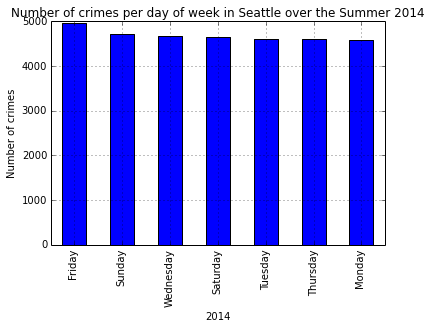

In [77]:
plt.figure(2)
crimes_per_day.plot(kind='bar', legend=False)
plt.ylabel('Number of crimes')
plt.xlabel('2014')
# plt.xticks([0,1,2], ['June', 'July', 'August'], rotation=0)
plt.grid(True)
plt.title('Number of crimes per day of week in Seattle over the Summer 2014')

In [78]:
100.*(crimes_per_day.ix[0,'count'] - crimes_per_day.ix[1:7,'count'].mean())/crimes_per_day.ix[1:7,'count'].mean()

6.9772457672813548

Overall, crimes tend to be uniformly distributed throughout the week. Fridays, however, show higher activity, with ~7% more than crimes than the average over the other days.

In [79]:
df['Occurred Hour'] = df['Datetime Occurred'].dt.hour

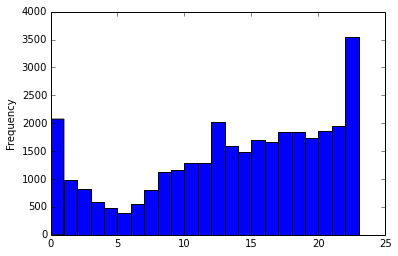

In [80]:
plt.figure(21)
df['Occurred Hour'].plot(kind='hist', bins=range(0,24,1))

In [81]:
df.ix[0:5,'Occurred Hour']

df['Period'] = np.nan
df.ix[((df['Occurred Hour']>=6.) & (df['Occurred Hour']<12.)), 'Period'] = 'Morning'
df.ix[((df['Occurred Hour']>=12.) & (df['Occurred Hour']<13.)), 'Period'] = 'Lunch'
df.ix[((df['Occurred Hour']>=13.) & (df['Occurred Hour']<19.)), 'Period'] = 'Afternoon'
df.ix[((df['Occurred Hour']>=19.) & (df['Occurred Hour']<23.)), 'Period'] = 'Evening'
df.ix[((df['Occurred Hour']>=23.) | (df['Occurred Hour']<6.)), 'Period'] = 'Night'
print(df.head())


   RMS CDW ID  General Offense Number Offense Code  Offense Code Extension  \
0      483839              2015218538         2202                       0   
1      481252              2015213067         2610                       0   
2      481375              2015210301         2316                       0   
3      481690              2015209327         2599                       0   
4      478198              2015207880         2399                       3   

           Offense Type Summary Offense Code Summarized Offense Description  \
0    BURGLARY-FORCE-RES                 2200                       BURGLARY   
1  FRAUD-IDENTITY THEFT                 2600                          FRAUD   
2            THEFT-MAIL                 2300                     MAIL THEFT   
3           COUNTERFEIT                 2500                    COUNTERFEIT   
4             THEFT-OTH                 2300                 OTHER PROPERTY   

            Date Reported Occurred Date or Date Range St

Period        Afternoon  Evening  Lunch  Morning  Night
Occurred Day                                           
Friday             1560     1113    340      927   1020
Monday             1435     1001    287     1029    835
Saturday           1310     1034    268      764   1271
Sunday             1422     1104    275      673   1241
Thursday           1454     1066    335      866    875


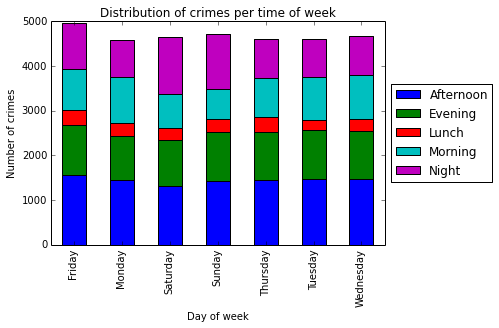

In [82]:
plt.figure(3)
crimes_day_hour = df.groupby(['Occurred Day', 'Period'])['General Offense Number'].count().unstack('Period')
print(crimes_day_hour.head())
crimes_day_hour.plot(kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Number of crimes')
plt.xlabel('Day of week')
plt.title('Distribution of crimes per time of week')

In [83]:
crimes_day_periods_perc=crimes_day_hour.copy()
crimes_day_periods_perc = crimes_day_periods_perc.apply(lambda x: x / x.sum() * 100, axis=1)
crimes_day_periods_perc

Period,Afternoon,Evening,Lunch,Morning,Night
Occurred Day,,,,,
Friday,31.451613,22.439516,6.854839,18.689516,20.564516
Monday,31.284064,21.822542,6.256813,22.432963,18.203619
Saturday,28.190230,22.250915,5.767162,16.440714,27.350979
Sunday,30.159067,23.414634,5.832450,14.273595,26.320255
Thursday,31.636205,23.194082,7.288947,18.842472,19.038294
Tuesday,31.916739,23.460538,5.225499,20.988725,18.408500
Wednesday,31.424281,23.101673,5.877306,21.149721,18.447018


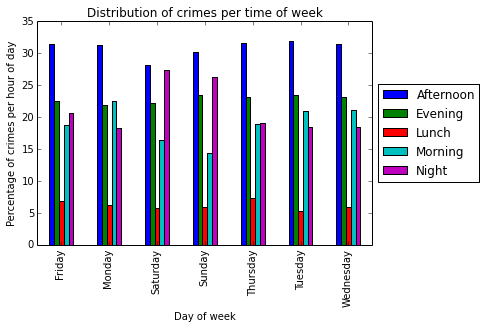

In [84]:
plt.figure(4)
crimes_day_periods_perc.plot(kind='bar', stacked=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percentage of crimes per hour of day')
plt.xlabel('Day of week')
plt.title('Distribution of crimes per time of week')

Overall, more than 50% of crimes typically happen in the afternoon or evening (i.e. between 13:00 and 23:00). During the weekend, however, afternoon and morning crimes are outnumbered by those occurring at night. While nightly activity is close 18-20% during the week, on Saturdays and Sundays it reaches ~ 28%. Lunch time is usually quiet, with less than 8% of activity.

In [85]:
set(df['Offense Type'])

{'ANIMAL-BITE',
 'ANIMAL-CRUELTY',
 'ANIMAL-OTH',
 'ASSLT-AGG-BODYFORCE',
 'ASSLT-AGG-GUN',
 'ASSLT-AGG-POLICE-BODYFORCE',
 'ASSLT-AGG-POLICE-GUN',
 'ASSLT-AGG-POLICE-WEAPON',
 'ASSLT-AGG-WEAPON',
 'ASSLT-NONAGG',
 'ASSLT-NONAGG-POLICE',
 'BIAS INCIDENT',
 'BURGLARY-FORCE-NONRES',
 'BURGLARY-FORCE-RES',
 'BURGLARY-NOFORCE-NONRES',
 'BURGLARY-NOFORCE-RES',
 'BURGLARY-SECURE PARKING-NONRES',
 'BURGLARY-SECURE PARKING-RES',
 'COUNTERFEIT',
 'DISORDERLY CONDUCT',
 'DISPUTE-CIVIL PROPERTY (AUTO)',
 'DISPUTE-CIVIL PROPERTY (NON AU',
 'DISPUTE-OTH',
 'DISTURBANCE-NOISE',
 'DISTURBANCE-OTH',
 'DRIVE-BY',
 'DUI-DRUGS',
 'DUI-LIQUOR',
 'ELUDING-FELONY FLIGHT',
 'EMBEZZLE',
 'ENDANGERMENT',
 'ESCAPE',
 'FALSE REPORT',
 'FIREWORK-POSSESS',
 'FIREWORK-USE',
 'FORGERY-CHECK',
 'FORGERY-CREDIT CARD',
 'FORGERY-OTH',
 'FRAUD-CHECK',
 'FRAUD-COMPUTER',
 'FRAUD-CREDIT CARD',
 'FRAUD-IDENTITY THEFT',
 'FRAUD-OTHER',
 'FRAUD-WIRE-ELECTRONIC',
 'HARASSMENT',
 'HOMICIDE-JUST-GUN',
 'HOMICIDE-JUST-WEAPON',
 

In [86]:
df['Shorten offense'] = [x.split('-')[0] for x in df['Offense Type']]

In [87]:
df['Shorten offense'] = [x.strip() for x in df['Shorten offense']]

In [88]:
set(df['Shorten offense'])

{'ANIMAL',
 'ASSLT',
 'BIAS INCIDENT',
 'BURGLARY',
 'COUNTERFEIT',
 'DISORDERLY CONDUCT',
 'DISPUTE',
 'DISTURBANCE',
 'DRIVE',
 'DUI',
 'ELUDING',
 'EMBEZZLE',
 'ENDANGERMENT',
 'ESCAPE',
 'FALSE REPORT',
 'FIREWORK',
 'FORGERY',
 'FRAUD',
 'HARASSMENT',
 'HOMICIDE',
 'ILLEGAL DUMPING',
 'INJURY',
 'LIQUOR LAW VIOLATION',
 'MALICIOUS HARASSMENT',
 'NARC',
 'OBSTRUCT',
 'PORNOGRAPHY',
 'PROP RECOVERED',
 'PROPERTY DAMAGE',
 'PROPERTY FOUND',
 'PROPERTY LOST',
 'PROPERTY STOLEN',
 'PROSTITUTION',
 'PROSTITUTION LOITERING',
 'PROSTITUTION PATRONIZING',
 'RECKLESS BURNING',
 'ROBBERY',
 'THEFT',
 'THEFT OF SERVICES',
 'THREATS',
 'TRAFFIC',
 'TRESPASS',
 'URINATING/DEFECATING',
 'VEH',
 'VIOL',
 'WARRANT',
 'WARRARR',
 'WEAPON',
 '[INC'}

In [89]:
df.ix[df['Shorten offense'] == 'PROSTITUTION LOITERING','Shorten offense'] = 'PROSTITUTION'
df.ix[df['Shorten offense'] == 'PROSTITUTION PATRONIZING','Shorten offense'] = 'PROSTITUTION'
df.ix[df['Shorten offense'] == 'VIOL','Shorten offense'] = 'VIOLENCE'
df.ix[df['Shorten offense'] == 'VEH','Shorten offense'] = 'VEH. THEFT'
df.ix[df['Shorten offense'] == 'DRIVE','Shorten offense'] = 'DRIVE-BY'
df.ix[df['Shorten offense'] == '[INC','Shorten offense'] = '[INC - CASE DC USE ONLY]'

In [90]:
set(df['Shorten offense'])

{'ANIMAL',
 'ASSLT',
 'BIAS INCIDENT',
 'BURGLARY',
 'COUNTERFEIT',
 'DISORDERLY CONDUCT',
 'DISPUTE',
 'DISTURBANCE',
 'DRIVE-BY',
 'DUI',
 'ELUDING',
 'EMBEZZLE',
 'ENDANGERMENT',
 'ESCAPE',
 'FALSE REPORT',
 'FIREWORK',
 'FORGERY',
 'FRAUD',
 'HARASSMENT',
 'HOMICIDE',
 'ILLEGAL DUMPING',
 'INJURY',
 'LIQUOR LAW VIOLATION',
 'MALICIOUS HARASSMENT',
 'NARC',
 'OBSTRUCT',
 'PORNOGRAPHY',
 'PROP RECOVERED',
 'PROPERTY DAMAGE',
 'PROPERTY FOUND',
 'PROPERTY LOST',
 'PROPERTY STOLEN',
 'PROSTITUTION',
 'RECKLESS BURNING',
 'ROBBERY',
 'THEFT',
 'THEFT OF SERVICES',
 'THREATS',
 'TRAFFIC',
 'TRESPASS',
 'URINATING/DEFECATING',
 'VEH. THEFT',
 'VIOLENCE',
 'WARRANT',
 'WARRARR',
 'WEAPON',
 '[INC - CASE DC USE ONLY]'}

In [91]:
len(set(df['Shorten offense']))

47

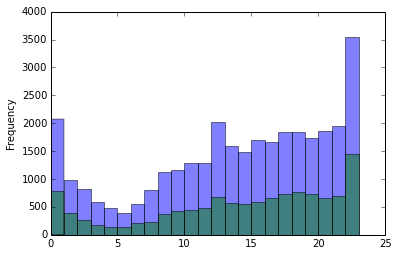

In [92]:
plt.figure(22)
thefts_hist = df[df['Shorten offense']=='THEFT']
df['Occurred Hour'].plot(kind='hist', bins=range(0,24,1),alpha=0.5)
thefts_hist['Occurred Hour'].plot(kind='hist', bins=range(0,24,1),alpha=0.5, color='green')

As seen below, thefts drive overall crime trends. A peak in activity is visible during the night, between 23:00 and  01:00, i.e. when most people are asleep or are ready to go to bed. Cumulatively, though, most of the thefts happen in the afternoon, between 13:00 and 19:00.

In [93]:
crimes_type = pd.DataFrame(df.groupby(['Shorten offense'])['General Offense Number'].count())
crimes_type.columns = ['count']
crimes_type = crimes_type.sort_values(by=['count'], ascending=[False])
type(crimes_type)

pandas.core.frame.DataFrame

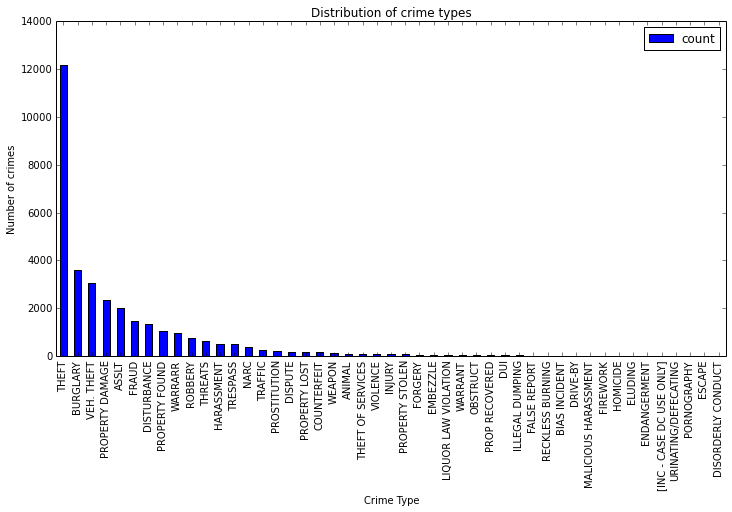

In [94]:
plt.figure(5)
plt.rcParams["figure.figsize"] = [12,6]
crimes_type.plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xlabel('Crime Type')
plt.title('Distribution of crime types')

In [95]:
print(100.*crimes_type.ix['THEFT']/crimes_type.sum())
print(100.*crimes_type.ix['BURGLARY']/crimes_type.sum())
print(100.*crimes_type.ix['VEH. THEFT']/crimes_type.sum())
print(100.*crimes_type.ix['PROPERTY DAMAGE']/crimes_type.sum())
print(100.*crimes_type.ix['ASSLT']/crimes_type.sum())

count    37.099973
dtype: float64
count    10.982641
dtype: float64
count    9.277281
dtype: float64
count    7.214985
dtype: float64
count    6.089264
dtype: float64


Theft is by far the type of crime that occurs the most. They represent 37% of all the crimes committed during the summer 2014. They are followed by buglaries (11%), vehicle theft (9%), property damage (7%) and assault (6%).

In [96]:
theft_day_period = df[df['Shorten offense'] == 'THEFT'].groupby(['Occurred Day', 'Period'])['General Offense Number'].count().unstack('Period')
theft_day_period

Period,Afternoon,Evening,Lunch,Morning,Night
Occurred Day,,,,,
Friday,601,448,105,328,374
Monday,502,381,87,351,313
Saturday,605,405,106,287,431
Sunday,583,391,97,250,507
Thursday,554,418,104,284,333
Tuesday,501,390,86,321,322
Wednesday,518,430,98,347,303


In [97]:
theft_day_period_perc=theft_day_period.copy()
theft_day_period_perc = theft_day_period_perc.apply(lambda x: x / x.sum() * 100, axis=1)
theft_day_period_perc

Period,Afternoon,Evening,Lunch,Morning,Night
Occurred Day,,,,,
Friday,32.381466,24.137931,5.657328,17.672414,20.150862
Monday,30.722154,23.317013,5.324357,21.481028,19.155447
Saturday,32.988004,22.082879,5.779716,15.648855,23.500545
Sunday,31.892779,21.389497,5.306346,13.676149,27.735230
Thursday,32.722977,24.689900,6.142942,16.774956,19.669226
Tuesday,30.925926,24.074074,5.308642,19.814815,19.876543
Wednesday,30.542453,25.353774,5.778302,20.459906,17.865566


Period        Afternoon    Evening     Lunch    Morning      Night
Occurred Day                                                      
Sunday        31.892779  21.389497  5.306346  13.676149  27.735230
Saturday      32.988004  22.082879  5.779716  15.648855  23.500545
Friday        32.381466  24.137931  5.657328  17.672414  20.150862
Tuesday       30.925926  24.074074  5.308642  19.814815  19.876543
Thursday      32.722977  24.689900  6.142942  16.774956  19.669226
Monday        30.722154  23.317013  5.324357  21.481028  19.155447
Wednesday     30.542453  25.353774  5.778302  20.459906  17.865566


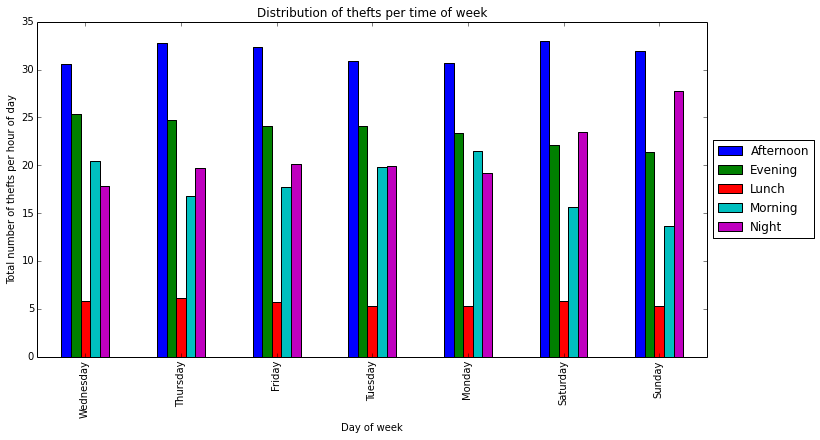

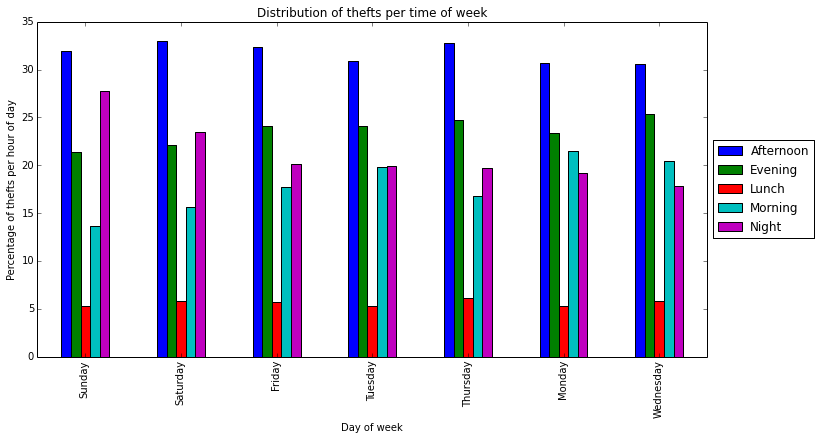

In [98]:
plt.figure(51)
theft_day_period= theft_day_period_perc.sort_values(by=['Evening'], ascending=[False])
# print(theft_day_period)

theft_day_period.plot(kind='bar', stacked=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Total number of thefts per hour of day')
plt.xlabel('Day of week')
plt.title('Distribution of thefts per time of week')

plt.figure(6)
theft_day_period_perc= theft_day_period_perc.sort_values(by=['Night'], ascending=[False])
print(theft_day_period_perc)

theft_day_period_perc.plot(kind='bar', stacked=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percentage of thefts per hour of day')
plt.xlabel('Day of week')
plt.title('Distribution of thefts per time of week')

As thefts represent the majority of crimes, the overall trends observed previously are similar to (because mainly driven by) those detected for thefts.
Most thefts occur in the afternoon, i.e. between 13:00 and 19:00 (as seen above). In aggregate, the number of afternoon events does not depend on the day of the week. This is also true for evening events (between 19:00 and 23:00). However, more thefts occur on weekend nights than on week nights, presumably because more people go out and are potential "preys". The rest of the study below focuses on trends observed at night (i.e. between 23:00 and 06:00, but mainly between 23:00 and 01:00).


Location of thefts per day -- to see if changes are visible during the weekend

In [99]:
nightly_thefts = pd.DataFrame(df[(df['Shorten offense'] == 'THEFT') & (df['Period'] == 'Night')].groupby(['Occurred Day', 'District/Sector'])['General Offense Number'].count().unstack('District/Sector'))

In [100]:
len(set(df['District/Sector']))
nightly_thefts

District/Sector,99,B,C,D,E,F,G,J,K,L,M,N,O,Q,R,S,U,W
Occurred Day,,,,,,,,,,,,,,,,,,
Friday,2.0,25.0,30.0,23.0,66.0,14.0,17.0,23.0,24.0,17.0,17.0,21.0,4.0,24.0,19.0,5.0,35.0,8.0
Monday,NaN,31.0,24.0,30.0,32.0,12.0,12.0,27.0,12.0,25.0,16.0,9.0,5.0,14.0,26.0,10.0,16.0,12.0
Saturday,NaN,35.0,34.0,28.0,76.0,21.0,9.0,27.0,19.0,16.0,25.0,29.0,17.0,35.0,15.0,12.0,22.0,11.0
Sunday,2.0,27.0,40.0,36.0,92.0,26.0,7.0,20.0,27.0,26.0,49.0,23.0,11.0,38.0,21.0,8.0,46.0,8.0
Thursday,NaN,28.0,18.0,25.0,29.0,15.0,13.0,24.0,18.0,21.0,23.0,12.0,10.0,29.0,14.0,20.0,30.0,3.0
Tuesday,NaN,37.0,6.0,28.0,22.0,19.0,9.0,25.0,11.0,10.0,27.0,19.0,11.0,29.0,15.0,18.0,17.0,19.0
Wednesday,NaN,26.0,18.0,25.0,16.0,13.0,6.0,32.0,17.0,18.0,24.0,23.0,7.0,16.0,13.0,15.0,29.0,5.0


District/Sector        99          B         C         D          E         F  \
Occurred Day                                                                    
Monday                NaN   9.904153  7.667732  9.584665  10.223642  3.833866   
Tuesday               NaN  11.490683  1.863354  8.695652   6.832298  5.900621   
Wednesday             NaN   8.580858  5.940594  8.250825   5.280528  4.290429   
Thursday              NaN   8.433735  5.421687  7.530120   8.734940  4.518072   
Friday           0.534759   6.684492  8.021390  6.149733  17.647059  3.743316   
Saturday              NaN   8.120650  7.888631  6.496520  17.633411  4.872390   
Sunday           0.394477   5.325444  7.889546  7.100592  18.145957  5.128205   

District/Sector         G          J         K         L         M         N  \
Occurred Day                                                                   
Monday           3.833866   8.626198  3.833866  7.987220  5.111821  2.875399   
Tuesday          2.795031   7.

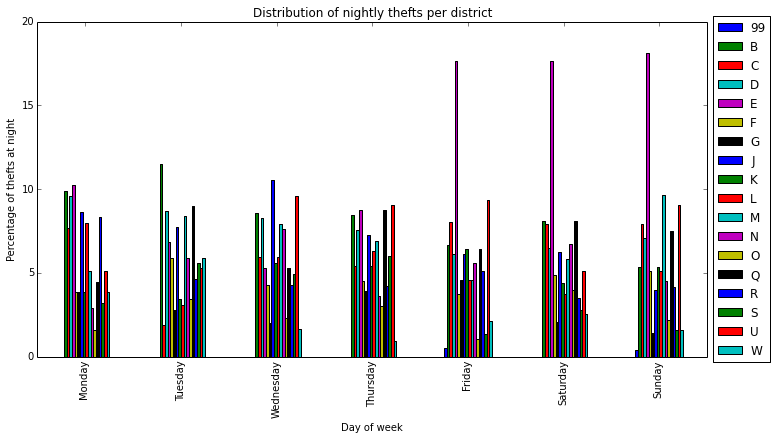

In [101]:
plt.figure(7)
nightly_thefts_perc = nightly_thefts.apply(lambda x: x / x.sum() * 100, axis=1)
nightly_thefts_perc = nightly_thefts_perc.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(nightly_thefts_perc)
nightly_thefts_perc.plot(kind='bar', stacked=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percentage of thefts at night')
plt.xlabel('Day of week')
plt.title('Distribution of nightly thefts per district')

Very interestingly, the percentage of theft increases dramatically on Friday, Saturday and Sunday nights in the E district. Thefts in that part of town represent up to 18% of all thefts. This goes down to ~ 10% on Mondays, is at its minimum on Wednesday (~5%), and starts going back up on Thursdays.

In [102]:
len(set(df['Zone/Beat']))

53

In [103]:
nightly_thefts_all = df[(df['Shorten offense'] == 'THEFT') & (df['Period'] == 'Night')]
set(nightly_thefts_all['District/Sector'])

nightly_thefts_all2 = nightly_thefts_all.copy()
nightly_thefts_all2['District2'] = nightly_thefts_all2['District/Sector']
nightly_thefts_all2.ix[nightly_thefts_all2['District/Sector'] == '99', 'District2'] = 'Z'
nightly_thefts_all2['District2'].fillna('A', inplace=True)
print(set(nightly_thefts_all2['District2']))
nightly_thefts_all2 = nightly_thefts_all2.dropna(subset = ['District2'])
print(set(nightly_thefts_all2['District2']))
nightly_thefts_all2['color'] = [ord(x) -64 for x in nightly_thefts_all2['District2']]
print(set(nightly_thefts_all2['color']))

# >> Color = number of thefts events per group


set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'K', 'J', 'M', 'L', 'O', 'N', 'Q', 'S', 'R', 'U', 'W', 'Z'])
set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'K', 'J', 'M', 'L', 'O', 'N', 'Q', 'S', 'R', 'U', 'W', 'Z'])
set([1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 23, 26])


In [104]:
nightly_thefts_all2.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Location,Month,Year,Datetime Occurred,Occurred Day,Occurred Hour,Period,Shorten offense,District2,color
6,470170,2015185464,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/04/2015 11:13:00 AM,06/01/2014 12:00:00 AM,06/01/2015 06:15:00 PM,...,"(47.640094502, -122.370772861)",6,2014,2014-06-01 00:00:00,Sunday,0,Night,THEFT,Q,17
12,478954,2015132500,2399,3,THEFT-OTH,2300,OTHER PROPERTY,04/23/2015 09:30:00 AM,06/20/2014 12:00:00 AM,04/22/2015 12:00:00 AM,...,"(47.725035551, -122.344996832)",6,2014,2014-06-20 00:00:00,Friday,0,Night,THEFT,N,14
13,451902,2015132500,2399,3,THEFT-OTH,2300,OTHER PROPERTY,04/23/2015 09:30:00 AM,06/20/2014 12:00:00 AM,04/22/2015 12:00:00 AM,...,"(47.725035551, -122.344996832)",6,2014,2014-06-20 00:00:00,Friday,0,Night,THEFT,N,14
17,451059,2015115270,2399,3,THEFT-OTH,2300,OTHER PROPERTY,04/08/2015 11:37:00 PM,06/01/2014 12:01:00 AM,04/08/2015 10:30:00 PM,...,"(47.533661622, -122.271314896)",6,2014,2014-06-01 00:01:00,Sunday,0,Night,THEFT,S,19
22,200727,201588472,2304,1,THEFT-AUTOACC,2300,OTHER PROPERTY,03/18/2015 08:44:00 AM,07/01/2014 12:00:00 AM,03/18/2015 08:20:00 AM,...,"(47.539678951, -122.379820912)",7,2014,2014-07-01 00:00:00,Tuesday,0,Night,THEFT,W,23


In [105]:
# groupby the value chosen in the widget
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.core.display import HTML


day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouped by day of week
theft_count = nightly_thefts_all2.groupby(['Occurred Day', 'District/Sector'])['General Offense Number'].count().unstack('District/Sector')
theft_lat = nightly_thefts_all2[nightly_thefts_all2['Latitude']!=0.0].groupby(['Occurred Day', 'District/Sector'])['Latitude'].mean().unstack('District/Sector')
theft_lon = nightly_thefts_all2[nightly_thefts_all2['Longitude']!=0.0].groupby(['Occurred Day', 'District/Sector'])['Longitude'].mean().unstack('District/Sector')
theft_count= theft_count.drop(['99'], axis=1)
theft_lat= theft_lat.drop(['99'], axis=1)
theft_lon= theft_lon.drop(['99'], axis=1)

# Overall
theft_all_count = pd.DataFrame(nightly_thefts_all2.groupby(['District/Sector'])['General Offense Number'].count())
theft_all_lat = pd.DataFrame(nightly_thefts_all2[nightly_thefts_all2['Latitude']!=0.0].groupby(['District/Sector'])['Latitude'].mean())
theft_all_lon = pd.DataFrame(nightly_thefts_all2[nightly_thefts_all2['Longitude']!=0.0].groupby(['District/Sector'])['Longitude'].mean())
theft_all_df = pd.concat([theft_all_count, theft_all_lat, theft_all_lon], axis=1)
theft_all_df = theft_all_df.ix[1:,:]
# print(theft_lon)

color_dict=dict(B='blue', C='cyan', D='olive', 
                E='purple', F='fushia', G='green',
                J='yellow', K='khaki', L='salmon',
                M='magenta', N='lime', O='orange', 
                Q='slategrey', R='red', S='brown',
                U='gold', W='lavender')

selection_left=widgets.Dropdown(description='Left: Day of week?')
selection_left.options=day_of_week
# display(selection_left)

# print(theft_count.shape)

def on_button_clicked(b):
    clear_output(wait=True)
    display(plt.gcf())


# #     fig = plt.figure(10)
#     nightly_thefts_all_subset = nightly_thefts_all2[nightly_thefts_all2['Occurred Day']==selection.value]
    
#     nightly_thefts_given_day = nightly_thefts_all2.groupby(['Occurred Day'])['General Offense Number'].count()
#     nightly_thefts_given_day['Friday']
    

#     for point in nightly_thefts_all_subset.iterrows():
#         folium.CircleMarker([point[1]['Latitude'], point[1]['Longitude']], radius=20., fill_color=linear(point[1]['color']), color=linear(point[1]['color']), fill_opacity=10).add_to(map)
    
    map = folium.Map(location=[47.607055,-122.321494], zoom_start=10, tiles='Stamen Terrain')
#     linear = cm.linear.Dark2.scale(1,26)

    for col in theft_count.columns:
        folium.CircleMarker([theft_lat.ix[selection_left.value,col], 
                             theft_lon.ix[selection_left.value,col]], 
                             radius=100.*np.sqrt(theft_count.ix[selection_left.value,col]),
                             fill_color=color_dict[col],
                             color=color_dict[col],
                             popup=folium.Popup(', '.join([col, str(int(theft_count.ix[selection_left.value,col]))+' events']))).add_to(map)

    map.save('Nightly_thefts_map_left_explor.html')
    display(HTML('<iframe width="45%" height="350" src="Nightly_thefts_map_left_explor.html" align="left"></iframe>'
                 '<iframe width="45%" height="350" src="Nightly_thefts_map_right_explor.html" align="right"></iframe>'))

# button=widgets.Button(description="Make left graph")
# display(button)
# button.on_click(on_button_clicked)
selection_left.observe(on_button_clicked)
display(selection_left)

# Help: https://medium.com/@captain_eli/3-ways-to-make-interactive-graphs-in-jupyter-notebooks-154cbb4796a9#.du361ot84    


# Overall map
# map = folium.Map(location=[47.607055,-122.321494], zoom_start=10, tiles='Stamen Terrain')

# for point in theft_all_df.iterrows():
#     folium.CircleMarker([point[1]['Latitude'], point[1]['Longitude']], 
#                          radius=15.*point[1]['General Offense Number'],
#                          fill_color=color_dict[point[0]],
#                          color=color_dict[point[0]]).add_to(map)
# map.save('Nightly_overall_thefts_map.html')


selection_right=widgets.Dropdown(description='Right: Day of week?')
selection_right.options=day_of_week
selection_right.value='Friday'
# display(selection_right)


def on_button_clicked2(b):
    clear_output(wait=True)
    display(plt.gcf())

    
#     fig = plt.figure(10)
#     nightly_thefts_all_subset = nightly_thefts_all2[nightly_thefts_all2['Occurred Day']==selection.value]
    
#     nightly_thefts_given_day = nightly_thefts_all2.groupby(['Occurred Day'])['General Offense Number'].count()
#     nightly_thefts_given_day['Friday']
    

#     for point in nightly_thefts_all_subset.iterrows():
#         folium.CircleMarker([point[1]['Latitude'], point[1]['Longitude']], radius=20., fill_color=linear(point[1]['color']), color=linear(point[1]['color']), fill_opacity=10).add_to(map)
    
    map = folium.Map(location=[47.607055,-122.321494], zoom_start=10, tiles='Stamen Terrain')
#     linear = cm.linear.Dark2.scale(1,26)

    for col in theft_count.columns:
        folium.CircleMarker([theft_lat.ix[selection_right.value,col], 
                             theft_lon.ix[selection_right.value,col]], 
                             radius=100*np.sqrt(theft_count.ix[selection_right.value,col]),
                             fill_color=color_dict[col],
                             color=color_dict[col],
                             popup=folium.Popup(', '.join([col, str(int(theft_count.ix[selection_right.value,col]))+' events']))).add_to(map)
       
    map.save('Nightly_thefts_map_right_explor.html')
    display(HTML('<iframe width="45%" height="350" src="Nightly_thefts_map_left_explor.html" align="left"></iframe>'
                 '<iframe width="45%" height="350" src="Nightly_thefts_map_right_explor.html" align="right"></iframe>'))

# button2=widgets.Button(description="Make right graph")
# display(button2)
# button2.on_click(on_button_clicked2)
selection_right.observe(on_button_clicked2)
display(selection_right)


Please, click on the circles to display their District/Sector names and number of thefts

In [106]:
theft_count

District/Sector,B,C,D,E,F,G,J,K,L,M,N,O,Q,R,S,U,W
Occurred Day,,,,,,,,,,,,,,,,,
Friday,25.0,30.0,23.0,66.0,14.0,17.0,23.0,24.0,17.0,17.0,21.0,4.0,24.0,19.0,5.0,35.0,8.0
Monday,31.0,24.0,30.0,32.0,12.0,12.0,27.0,12.0,25.0,16.0,9.0,5.0,14.0,26.0,10.0,16.0,12.0
Saturday,35.0,34.0,28.0,76.0,21.0,9.0,27.0,19.0,16.0,25.0,29.0,17.0,35.0,15.0,12.0,22.0,11.0
Sunday,27.0,40.0,36.0,92.0,26.0,7.0,20.0,27.0,26.0,49.0,23.0,11.0,38.0,21.0,8.0,46.0,8.0
Thursday,28.0,18.0,25.0,29.0,15.0,13.0,24.0,18.0,21.0,23.0,12.0,10.0,29.0,14.0,20.0,30.0,3.0
Tuesday,37.0,6.0,28.0,22.0,19.0,9.0,25.0,11.0,10.0,27.0,19.0,11.0,29.0,15.0,18.0,17.0,19.0
Wednesday,26.0,18.0,25.0,16.0,13.0,6.0,32.0,17.0,18.0,24.0,23.0,7.0,16.0,13.0,15.0,29.0,5.0


In [107]:
%%HTML
<iframe width="45%" height="350" src="Nightly_thefts_map_left_explor.html"></iframe>
<iframe width="45%" height="350" src="Nightly_thefts_map_right_explor.html"></iframe>

Note: Number of events shows on the map is < number counted in the graphs, because removed the events with lat=lon=0deg --> Actually, no because removed the points with lat=lon=0 only for the calculation of the avg lat and avg lon, not total counts

Removed records for District/Sector '99' because mostly NaNs, and records for which District/Sector = NaN

In [108]:
# map = folium.Map(location=[47.607055,-122.321494], zoom_start=11)
# linear = cm.linear.Dark2.scale(1,26)
# linear

# for point in nightly_thefts_all2.iterrows():
#     folium.CircleMarker([point[1]['Latitude'], point[1]['Longitude']], radius=20., fill_color=linear(point[1]['color']), color=linear(point[1]['color']), fill_opacity=10).add_to(map)
# map.save('Nightly_thefts_map.html')

In [109]:
# %%HTML
# <iframe width="100%" height="350" src="Nightly_thefts_map.html"></iframe>

In [110]:
nightly_thefts_all_subset = nightly_thefts_all2[nightly_thefts_all2['Occurred Day']=='Friday']

In [111]:
theft_count = nightly_thefts_all2.groupby(['Occurred Day', 'District/Sector'])['General Offense Number'].count().unstack('District/Sector')
theft_lat = nightly_thefts_all2.groupby(['Occurred Day', 'District/Sector'])['Latitude'].mean().unstack('District/Sector')
# theft_count = nightly_thefts_all2.groupby(['Occurred Day'])['General Offense Number'].count()
# theft_lat = nightly_thefts_all2.groupby(['Occurred Day'])['Latitude'].mean()
print(theft_lon), theft_lat.ix['Friday','E']
theft_count= theft_count.drop(['99'], axis=1)
theft_count

District/Sector           B           C           D           E           F  \
Occurred Day                                                                  
Friday          -122.366711 -122.308133 -122.340716 -122.322206 -122.336767   
Monday          -122.361177 -122.311775 -122.335194 -122.320937 -122.358787   
Saturday        -122.361118 -122.313144 -122.340595 -122.320432 -122.348279   
Sunday          -122.368932 -122.311861 -122.341648 -122.321225 -122.347187   
Thursday        -122.363774 -122.311298 -122.342298 -122.321748 -122.339816   
Tuesday         -122.364786 -122.315802 -122.341173 -122.321394 -122.346539   
Wednesday       -122.373038 -122.310050 -122.339248 -122.323987 -122.354892   

District/Sector           G           J           K           L           M  \
Occurred Day                                                                  
Friday          -122.303916 -122.349152 -122.331780 -122.300174 -122.341114   
Monday          -122.304961 -122.350914 -122.330455

District/Sector,B,C,D,E,F,G,J,K,L,M,N,O,Q,R,S,U,W
Occurred Day,,,,,,,,,,,,,,,,,
Friday,25.0,30.0,23.0,66.0,14.0,17.0,23.0,24.0,17.0,17.0,21.0,4.0,24.0,19.0,5.0,35.0,8.0
Monday,31.0,24.0,30.0,32.0,12.0,12.0,27.0,12.0,25.0,16.0,9.0,5.0,14.0,26.0,10.0,16.0,12.0
Saturday,35.0,34.0,28.0,76.0,21.0,9.0,27.0,19.0,16.0,25.0,29.0,17.0,35.0,15.0,12.0,22.0,11.0
Sunday,27.0,40.0,36.0,92.0,26.0,7.0,20.0,27.0,26.0,49.0,23.0,11.0,38.0,21.0,8.0,46.0,8.0
Thursday,28.0,18.0,25.0,29.0,15.0,13.0,24.0,18.0,21.0,23.0,12.0,10.0,29.0,14.0,20.0,30.0,3.0
Tuesday,37.0,6.0,28.0,22.0,19.0,9.0,25.0,11.0,10.0,27.0,19.0,11.0,29.0,15.0,18.0,17.0,19.0
Wednesday,26.0,18.0,25.0,16.0,13.0,6.0,32.0,17.0,18.0,24.0,23.0,7.0,16.0,13.0,15.0,29.0,5.0


Offense Type  THEFT-AUTOACC  THEFT-BICYCLE  THEFT-BUILDING  THEFT-CARPROWL  \
Occurred Day                                                                 
Monday                  2.0            6.0             1.0            12.0   
Tuesday                 1.0            1.0             2.0            15.0   
Wednesday               NaN            NaN             1.0            10.0   
Thursday                1.0            4.0             1.0            18.0   
Friday                  NaN            3.0             7.0            42.0   
Saturday                NaN            1.0            14.0            29.0   
Sunday                  NaN            2.0             7.0            47.0   

Offense Type  THEFT-LICENSE PLATE  THEFT-MAIL  THEFT-OTH  THEFT-PKPOCKET  \
Occurred Day                                                               
Monday                        NaN         2.0        9.0             NaN   
Tuesday                       NaN         NaN        3.0             

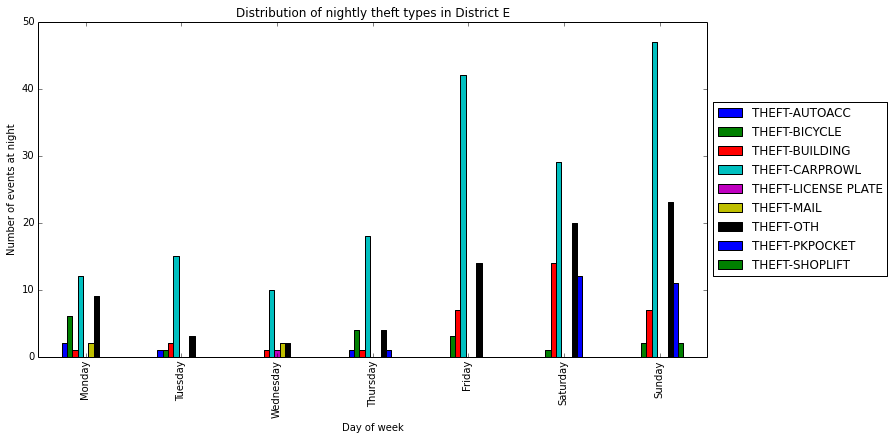

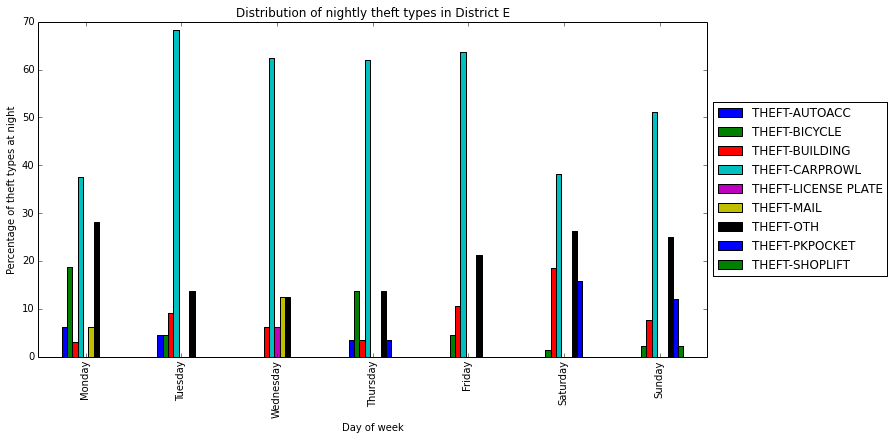

In [112]:
district_e_theft_types = pd.DataFrame(df[(df['Shorten offense'] == 'THEFT') & (df['Period'] == 'Night') & (df['District/Sector'] == 'E')].groupby(['Occurred Day', 'Offense Type'])['General Offense Number'].count().unstack('Offense Type'))
# print(district_e_theft_types)

plt.figure(19)
district_e_theft_types = district_e_theft_types.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(district_e_theft_types)
district_e_theft_types.plot(kind='bar', stacked=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Number of events at night')
plt.xlabel('Day of week')
plt.title('Distribution of nightly theft types in District E')

plt.figure(20)
district_e_thefts_perc = district_e_theft_types.apply(lambda x: x / x.sum() * 100, axis=1)
district_e_thefts_perc = district_e_thefts_perc.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# print(district_e_thefts_perc)
district_e_thefts_perc.plot(kind='bar', stacked=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percentage of theft types at night')
plt.xlabel('Day of week')
plt.title('Distribution of nightly theft types in District E')

[[  2.   1.  nan   1.  nan  nan  nan]
 [  6.   1.  nan   4.   3.   1.   2.]
 [  1.   2.   1.   1.   7.  14.   7.]
 [ 12.  15.  10.  18.  42.  29.  47.]
 [ nan  nan   1.  nan  nan  nan  nan]
 [  2.  nan   2.  nan  nan  nan  nan]
 [  9.   3.   2.   4.  14.  20.  23.]
 [ nan  nan  nan   1.  nan  12.  11.]
 [ nan  nan  nan  nan  nan  nan   2.]]


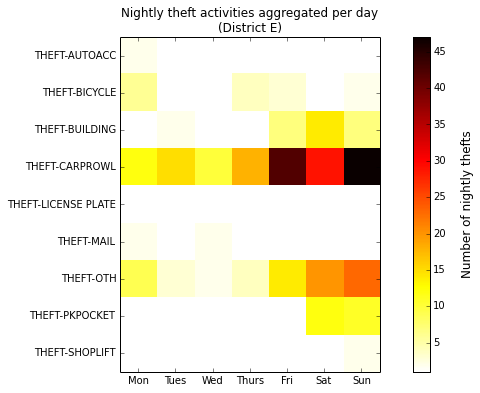

In [113]:
matr = district_e_theft_types.as_matrix().transpose()
print(matr)

plt.imshow(matr, cmap='hot_r', interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.yticks([0,1,2,3,4,5,6,7,8], district_e_theft_types.columns)
cbar = plt.colorbar()
plt.title('Nightly theft activities aggregated per day \n(District E)')

cbar.set_label('Number of nightly thefts', rotation=90, labelpad=15, fontsize=12)

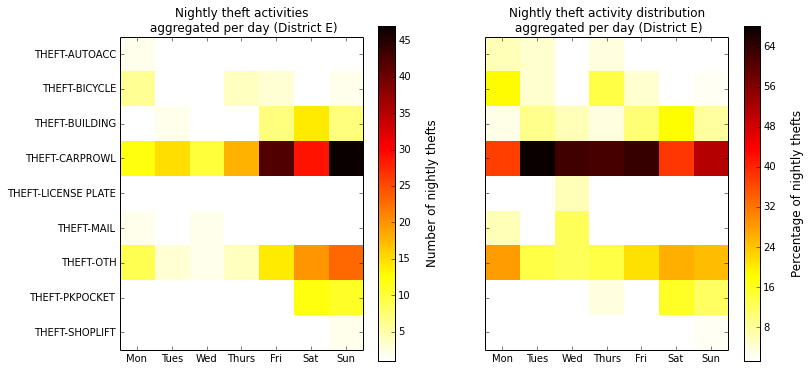

In [114]:
matr_perc = district_e_thefts_perc.as_matrix().transpose()

plt.subplot(1,2,1)
plt.imshow(matr, cmap='hot_r', interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.yticks([0,1,2,3,4,5,6,7,8], district_e_theft_types.columns)
cbar = plt.colorbar()
plt.title('Nightly theft activities \n aggregated per day (District E)')

cbar.set_label('Number of nightly thefts', rotation=90, labelpad=15, fontsize=12)

plt.subplot(1,2,2)
plt.imshow(matr_perc, cmap='hot_r', interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.yticks([0,1,2,3,4,5,6,7,8], ['','','','','','','','',''])
cbar = plt.colorbar()
plt.title('Nightly theft activity distribution \n aggregated per day (District E)')

cbar.set_label('Percentage of nightly thefts', rotation=90, labelpad=15, fontsize=12)

As seen before, the total number of thefts increases over the weekend. This trend is mainly driven by car prowls, which are by far the most numerous type of theft experienced in District E. Other types of theft also follow the same trend; theft by pick-pockets (dark blue), and other unspecified activities. Thus, the relative importance of car prowls decreases over the weekend. Interestingly, the pattern is somewhat changed here from those we have seen before, as this different theft types ratio is true on Saturdays, Sundays and Mondays (and not Fridays).

In [115]:
df.columns

Index([u'RMS CDW ID', u'General Offense Number', u'Offense Code',
       u'Offense Code Extension', u'Offense Type', u'Summary Offense Code',
       u'Summarized Offense Description', u'Date Reported',
       u'Occurred Date or Date Range Start', u'Occurred Date Range End',
       u'Hundred Block Location', u'District/Sector', u'Zone/Beat',
       u'Census Tract 2000', u'Longitude', u'Latitude', u'Location', u'Month',
       u'Year', u'Datetime Occurred', u'Occurred Day', u'Occurred Hour',
       u'Period', u'Shorten offense'],
      dtype='object')

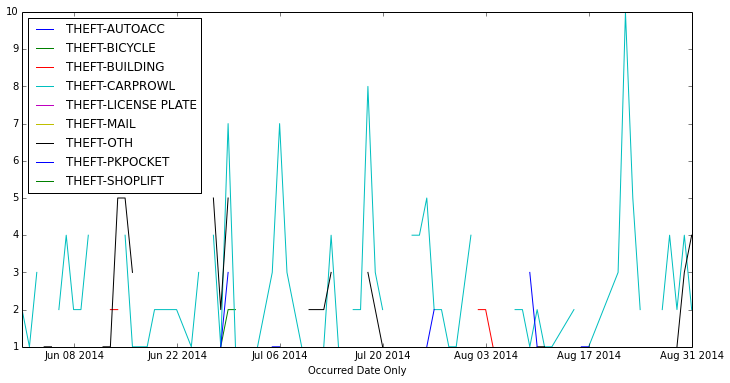

In [116]:
# from dateutil import parser
df['Occurred Date Only'] = [parser.parse(str(x)).date() for x in df['Datetime Occurred']]
nightly_car_prowl_district_e = pd.DataFrame(df[(df['Offense Type'] == 'THEFT-CARPROWL') & (df['Period'] == 'Night') & (df['District/Sector'] == 'E')].groupby(['Occurred Date Only'])['General Offense Number'].count())
nightly_car_prowl_district_e.head()
nightly_thefts_district_e = pd.DataFrame(df[(df['Shorten offense'] == 'THEFT') & (df['Period'] == 'Night') & (df['District/Sector'] == 'E')].groupby(['Occurred Date Only', 'Offense Type'])['General Offense Number'].count().unstack('Offense Type'))
# print(nightly_thefts_district_e)
# nightly_thefts_district_e.to_csv('night_thefts_district_e.csv')

plt.figure(21)
# nightly_car_prowl_district_e.plot()
nightly_thefts_district_e.plot()
plt.legend(loc='upper left')
